# WeatherPy

------------------------

Analysis
---------------------
569 cities were analyzed using the OpenWeatherMap API.
Thre is correlation between temperature and latitude. The temperatures are higher closer to the Equator (0° latitude) for both hemispheres. 
There is no correlation between humidity and latitude.
There is no correlation between cloudiness and latitude.
There is no correlation between Wind speed and latitude.
Humidity, cloudiness and wind speed points on the scatter plots seem to be scattered randomly, showing no correlation (<0.01).

References
---------------------
https://gendo90.github.io/python-api-challenge/
https://github.com/mileslucey/weatherpy/blob/master/WeatherPy.ipynb
https://github.com/cmmgw/World_Weather_Analysis/blob/main/WeatherPy.ipynb
https://github.com/poonam-ux/Python_API_WeatherPy_VacationPy/blob/main/WeatherPy/WeatherPy.ipynb
https://www.youtube.com/watch?v=9P5MY_2i7K8&ab_channel=NeuralNine
https://git.bootcampcontent.com/Northwestern-University/NU-VIRT-DATA-PT-04-2023-U-LOLC/-/blob/main/02-Homework/06-Python-APIs/Instructions/Starter_Code/starter_code/WeatherPy.ipynb

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

In [75]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                           "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | tual
Processing Record 5 of Set 1 | nuku'alofa
Processing Record 6 of Set 1 | kingston
Processing Record 7 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 8 of Set 1 | akureyri
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | nuuk
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | qarqaraly
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | igrim
Processing Record 21 of Set 1 | kanka

In [76]:
len(city_data)

569

In [77]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)

In [78]:
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [79]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,27.07,71,40,4.63,US,1685840260
1,stanley,54.8680,-1.6985,6.61,90,0,1.03,GB,1685840260
2,punta arenas,-53.1500,-70.9167,3.95,86,100,2.27,CL,1685840178
3,tual,-5.6667,132.7500,27.21,81,88,8.50,ID,1685840260
4,nuku'alofa,-21.1333,-175.2000,26.19,65,40,3.60,TO,1685840260


In [87]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities2.csv", index_label="City_ID")

In [88]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,27.07,71,40,4.63,US,1685840260
1,stanley,54.8680,-1.6985,6.61,90,0,1.03,GB,1685840260
2,punta arenas,-53.1500,-70.9167,3.95,86,100,2.27,CL,1685840178
3,tual,-5.6667,132.7500,27.21,81,88,8.50,ID,1685840260
4,nuku'alofa,-21.1333,-175.2000,26.19,65,40,3.60,TO,1685840260


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

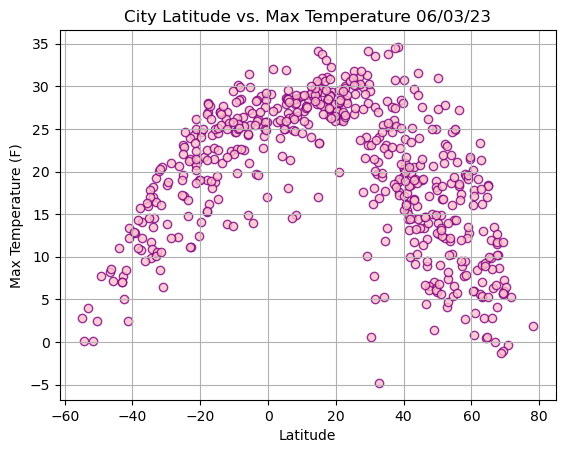

In [96]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,
            max_temps,
            color= "pink", edgecolor="purple", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1B.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

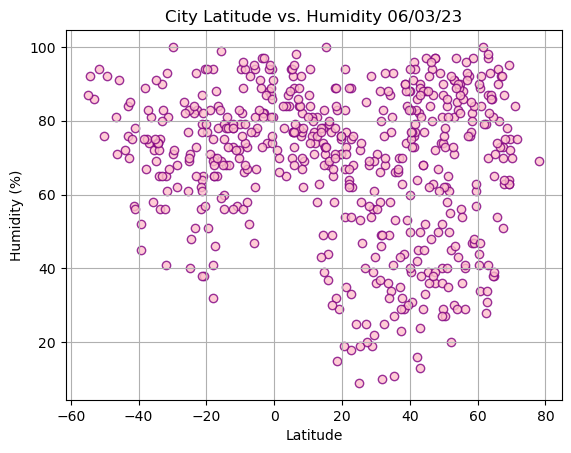

In [97]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            color= "pink", edgecolor="purple", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2B.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

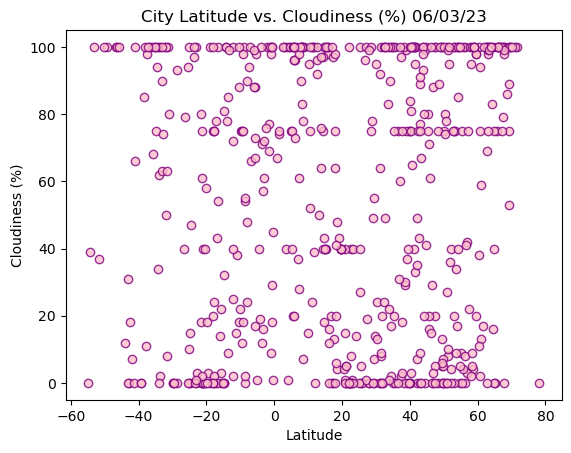

In [98]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            color= "pink", edgecolor="purple", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3B.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

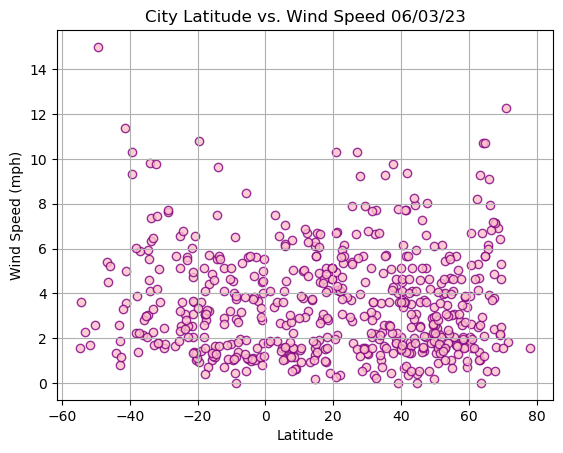

In [99]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            color= "pink", edgecolor="purple", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4B.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [128]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
    regress_values = x_values * slope + intercept
    
 # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

 # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, color= "pink", edgecolor="purple", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="black")   

    print(f"The r-value is: {rvalue}")

In [129]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,27.07,71,40,4.63,US,1685840260
1,stanley,54.8680,-1.6985,6.61,90,0,1.03,GB,1685840260
5,kingston,17.9970,-76.7936,26.53,89,75,5.14,JM,1685840260
6,akureyri,65.6835,-18.0878,11.96,54,75,6.17,IS,1685840261
10,bethel,41.3712,-73.4140,14.46,76,40,5.66,US,1685840261


In [130]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,3.95,86,100,2.27,CL,1685840178
3,tual,-5.6667,132.7500,27.21,81,88,8.50,ID,1685840260
4,nuku'alofa,-21.1333,-175.2000,26.19,65,40,3.60,TO,1685840260
7,adamstown,-25.0660,-130.1015,23.06,69,100,6.56,PN,1685840261
8,margaret river,-33.9500,115.0667,16.97,65,62,9.80,AU,1685839531


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.719080935634017


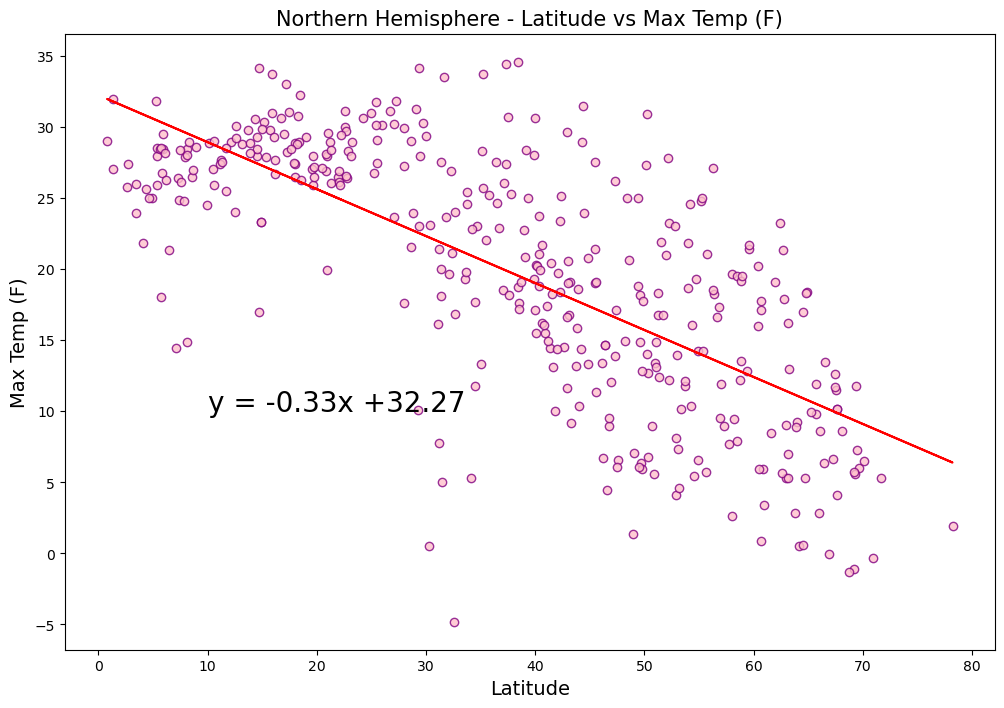

In [131]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

plt.savefig("../output_data/north_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

The r-value is: 0.8156656603796855


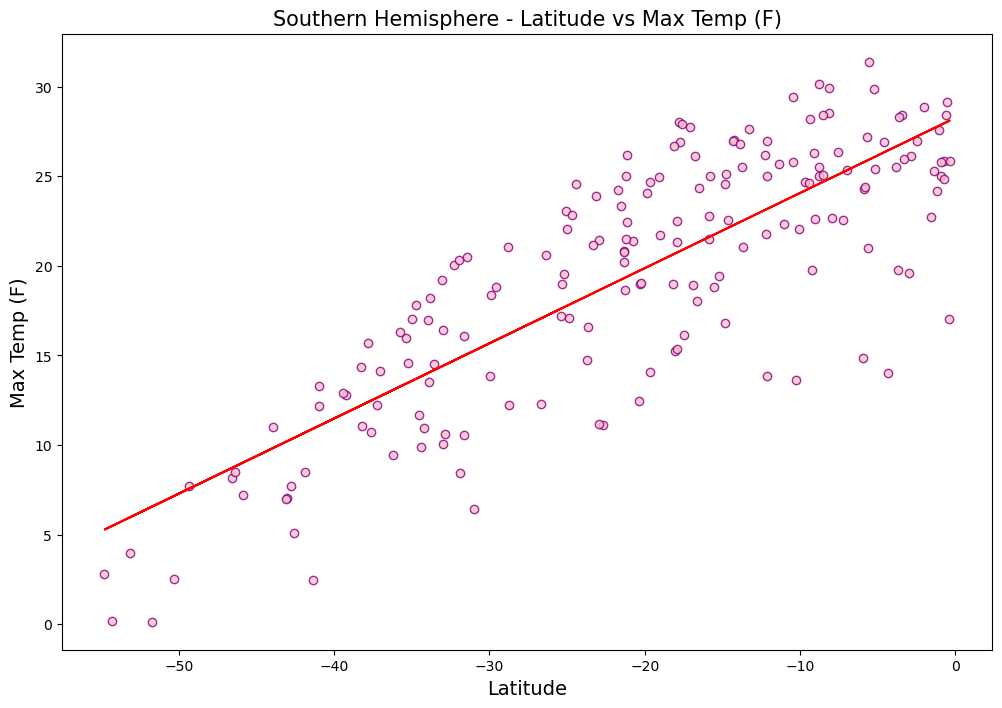

In [132]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

plt.savefig("../output_data/south_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** The correlation between latitude and maximum temperature is strong (over 0.7) for both the hemispheres. It is higher for southern hemisphere (0.82). Futher away from the equator, the maximum temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.026044421240469233


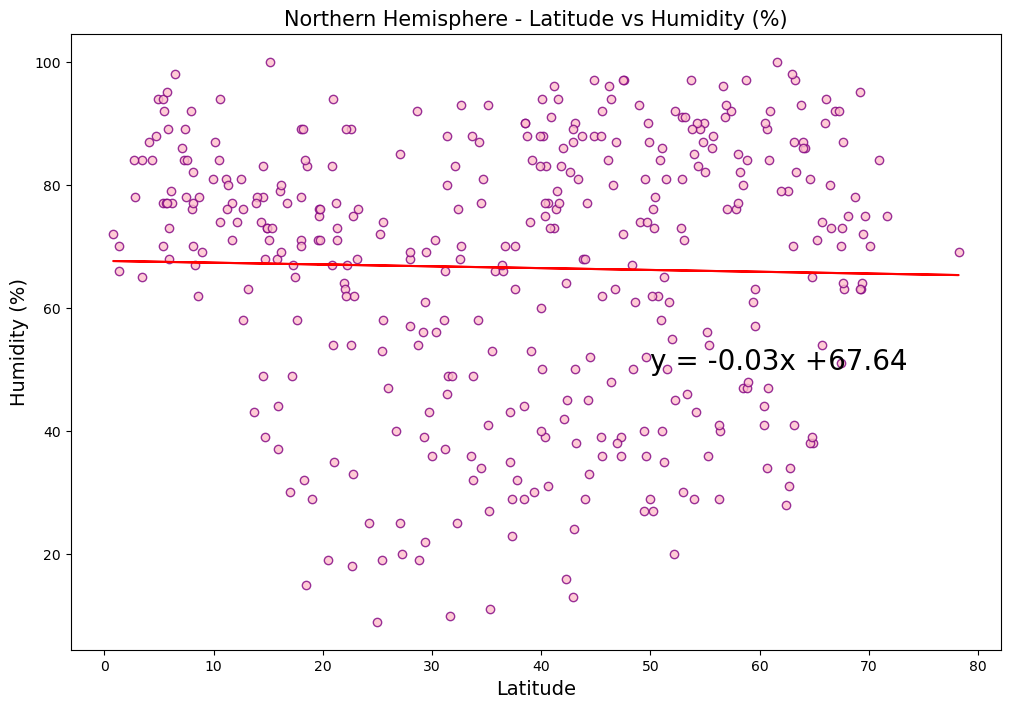

In [133]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))

plt.savefig("../output_data/north_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

The r-value is: 0.10520390685799906


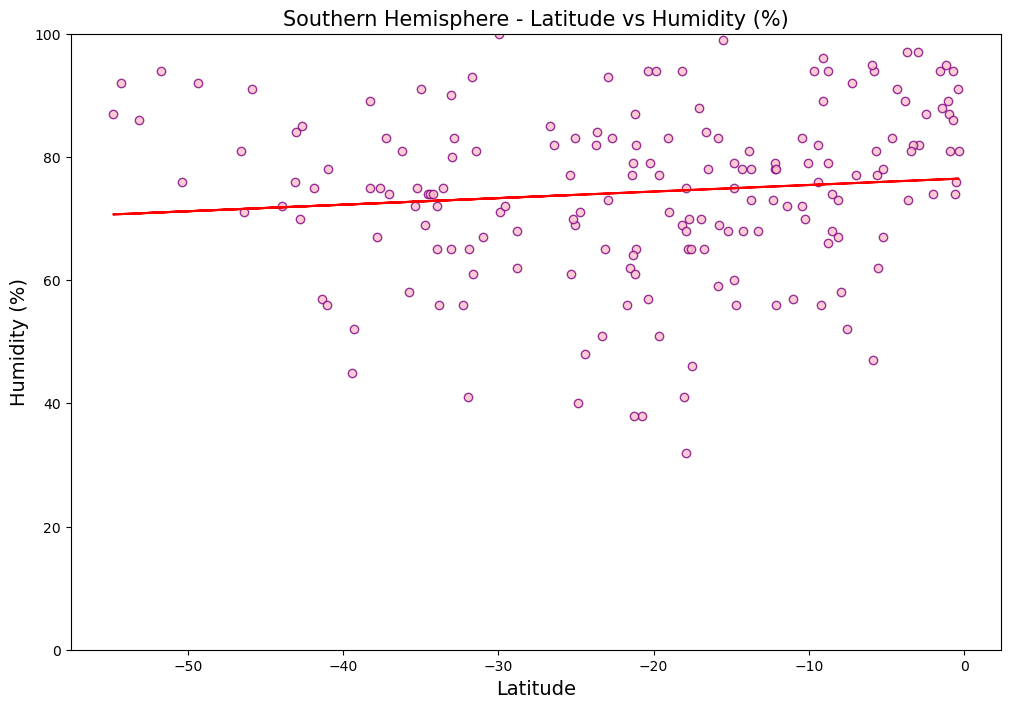

In [134]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)

plt.savefig("../output_data/south_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and humidity for any of the hemispheres (<0.2). 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05480718216260777


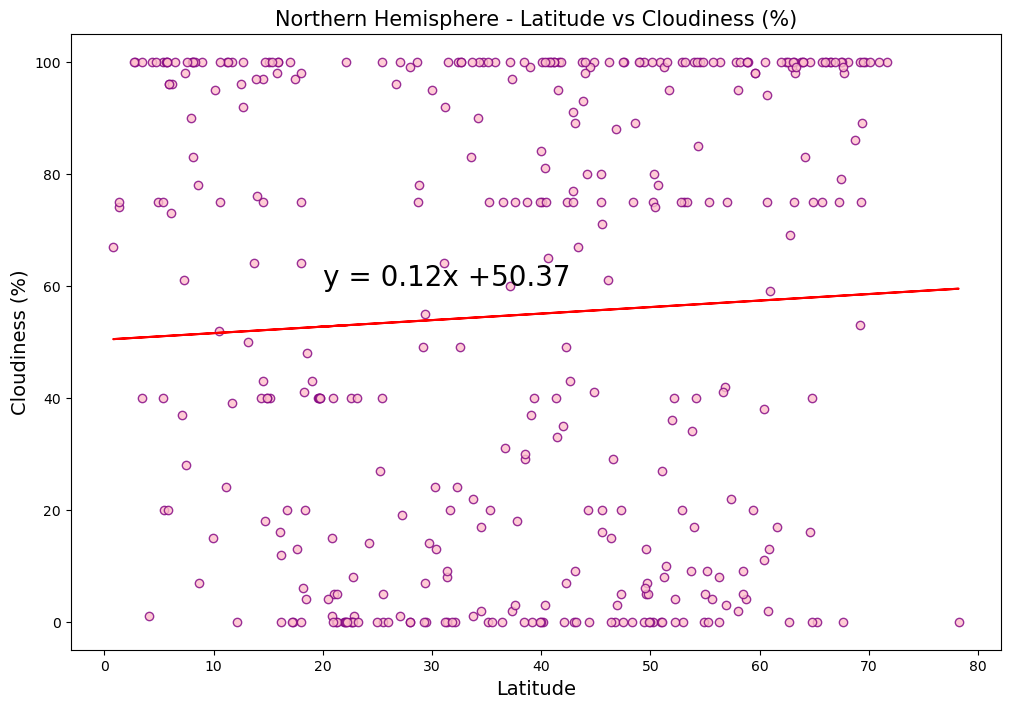

In [135]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("../output_data/north_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The r-value is: -0.009736195734165712


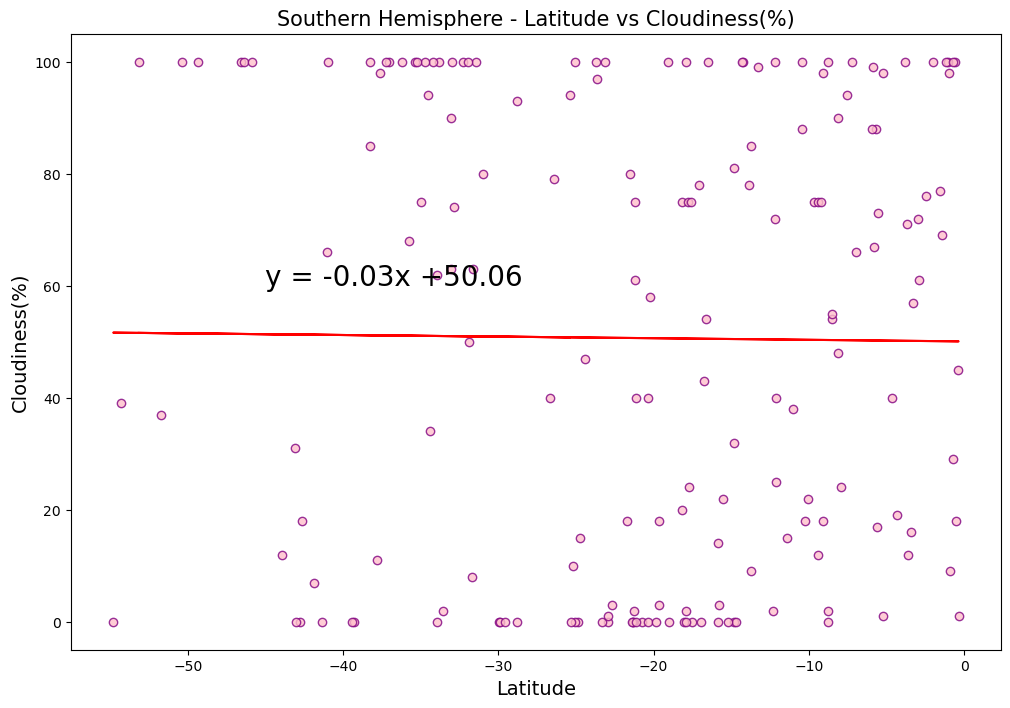

In [137]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("../output_data/south_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness for any of the hemispheres (<0.1>).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04077397448175305


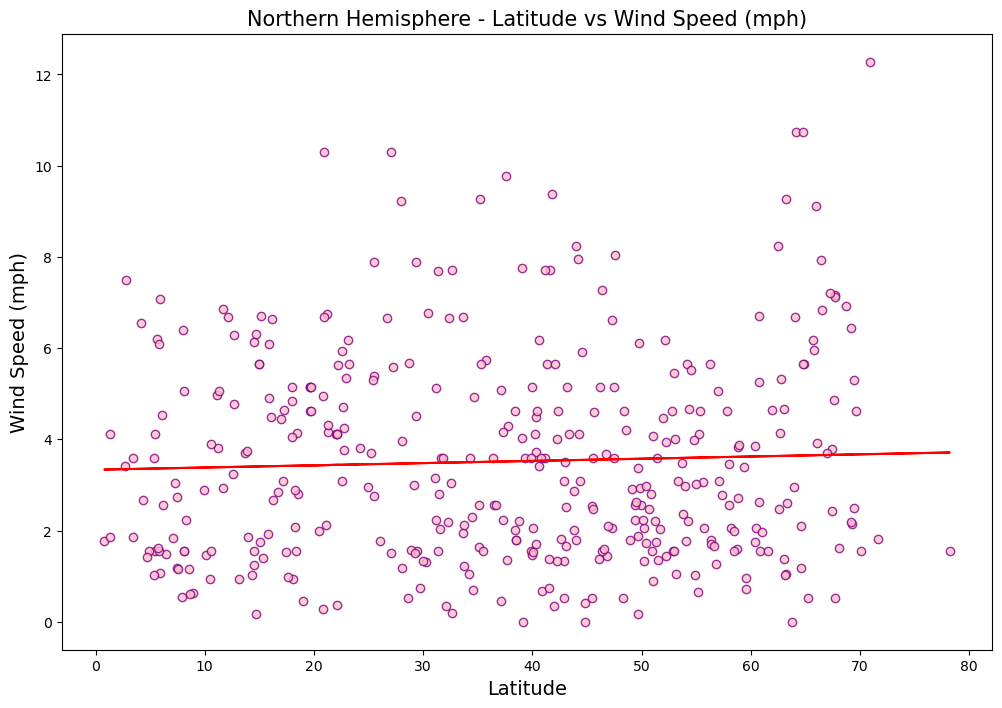

In [139]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

plt.savefig("../output_data/north_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The r-value is: -0.2115307074750585


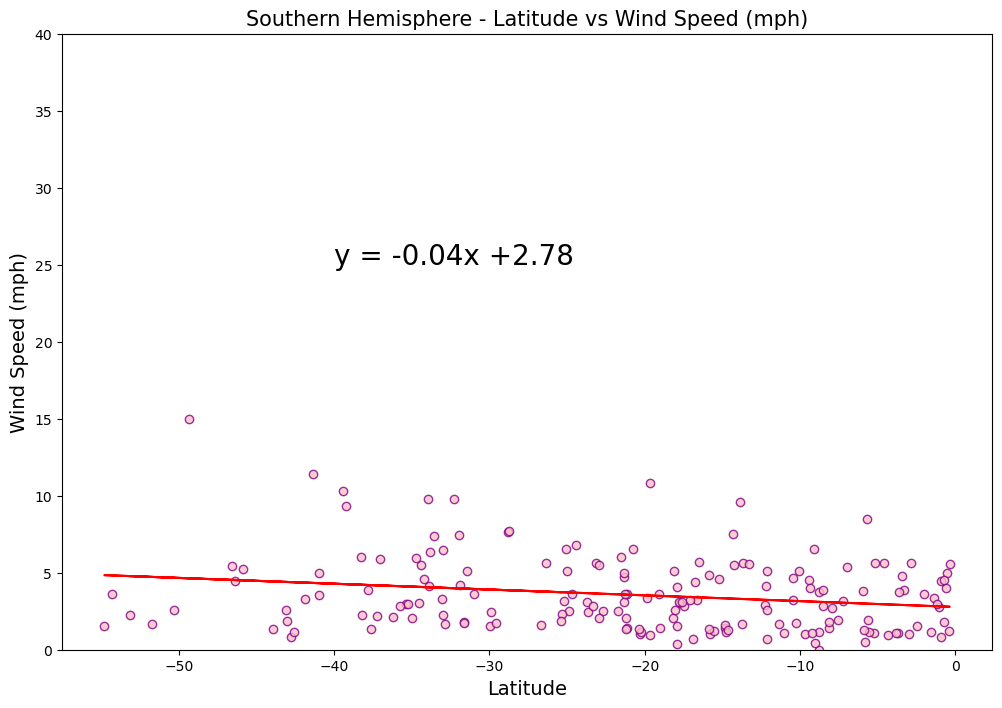

In [140]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)

plt.savefig("../output_data/south_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed fir any of the hemispheres.